#### Various classifiers from the scikit-learn package

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_2.csv", index_col = 0)
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


In [3]:
# Separate the target attribute
vs_records = vstable[['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']]
vs_target = vstable.Incidentals

In [4]:
# Create dummy varialbes
vs_matrix = pd.get_dummies(vs_records[['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']])
vs_matrix.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,False,True,True,False,False
2,54000,33,12,3.4,True,False,False,False,True
3,32000,20,42,1.6,True,False,False,True,False
4,59000,70,16,4.2,True,False,False,False,True
5,37000,35,25,3.2,False,True,True,False,False


In [5]:
# Divide into training and testing set
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size = 0.2, random_state = 33)
print(vs_train.shape)
print(vs_test.shape)

(40, 9)
(10, 9)


In [6]:
# Perform Min-Max Normalization to the training set to rescale numeric attributes
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_train_norm = pd.DataFrame(vs_train_norm, columns = vs_train.columns, index = vs_train.index)
vs_train_norm.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,0.454545,0.181818,0.162162,0.057143,0.0,1.0,1.0,0.0,0.0
35,0.829545,0.254545,0.864865,0.971429,0.0,1.0,1.0,0.0,0.0
18,0.056818,0.018182,0.756757,0.171429,1.0,0.0,1.0,0.0,0.0
40,0.181818,0.072727,0.567568,0.171429,0.0,1.0,1.0,0.0,0.0
2,0.602273,0.327273,0.027027,0.628571,1.0,0.0,0.0,0.0,1.0


In [7]:
# Perform Min-Max Normalization to the testing set to rescale numeric attributes
vs_test_norm = min_max_scaler.transform(vs_test)
vs_test_norm = pd.DataFrame(vs_test_norm, columns = vs_test.columns, index = vs_test.index)
vs_test_norm.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,0.193182,0.090909,0.486486,0.142857,0.0,1.0,1.0,0.0,0.0
28,0.636364,0.672727,0.297297,0.828571,0.0,1.0,0.0,1.0,0.0
38,0.454545,0.418182,0.243243,0.600000,0.0,1.0,0.0,0.0,1.0
16,0.181818,0.072727,0.405405,0.285714,0.0,1.0,1.0,0.0,0.0
41,0.556818,0.327273,0.162162,0.057143,1.0,0.0,0.0,0.0,1.0


KNN classifer

In [8]:
# KNN classifer
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance') # Initialize KNN classifier
knnclf.fit(vs_train_norm, vs_target_train) # Fit the model to the training set
knnpreds_test = knnclf.predict(vs_test_norm) # Predict the target labels for the testing set
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [9]:
knncm = confusion_matrix(vs_target_test, knnpreds_test) # Compute the confusion matrix
print('Confusion Matrix of the KNN classifier')
print(knncm)

Confusion Matrix of the KNN classifier
[[4 0]
 [0 6]]


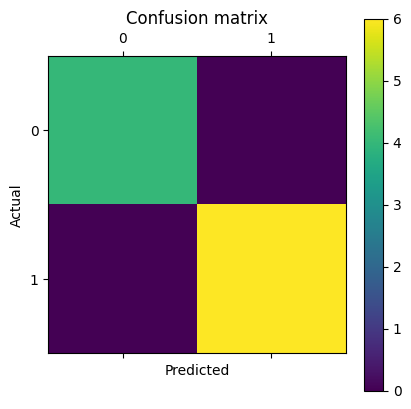

In [10]:
# Visualize the confusion matrix using a heatmap
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
knntrainacc = knnclf.score(vs_train_norm, vs_target_train) # Evaluate the accuracy on the training set
print(f'Accuracy of the KNN classifier on the training set is {knntrainacc}')
knntestacc = knnclf.score(vs_test_norm, vs_target_test) # Evaluate the accuracy on the testing set
print(f'Accuracy of the KNN classifier on the testing set is {knntestacc}')

Accuracy of the KNN classifier on the training set is 1.0
Accuracy of the KNN classifier on the testing set is 1.0


Decision Tree classifer

In [12]:
# Decision Tree classifer
dtclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 3) # Initialize Decision Tree classifier
dtclf = dtclf.fit(vs_train, vs_target_train) # Fit the model to the training set
treepreds_test = dtclf.predict(vs_test) # Predict the target labels for the testing set
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.50      0.75      0.60         4
         Yes       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [13]:
treecm = confusion_matrix(vs_target_test, treepreds_test) # Compute the confusion matrix
print('Confusion Matrix of the Decision Tree classifier')
print(treecm)

Confusion Matrix of the Decision Tree classifier
[[3 1]
 [3 3]]


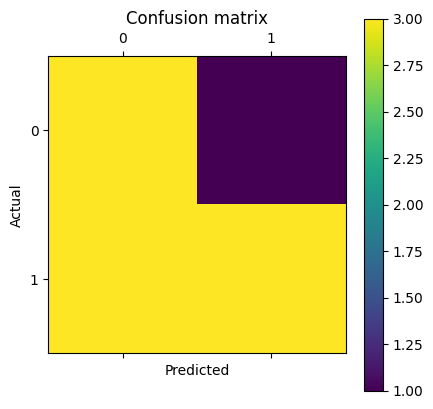

In [14]:
# Visualize the confusion matrix using a heatmap
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
dttrainacc = dtclf.score(vs_train, vs_target_train) # Evaluate the accuracy on the training set
print(f'Accuracy of the Decision Tree classifier on the training set is {dttrainacc}')
dttestacc = dtclf.score(vs_test, vs_target_test) # Evaluate the accuracy on the testing set
print(f'Accuracy of the Decision Tree classifier on the testing set is {dttestacc}')

Accuracy of the Decision Tree classifier on the training set is 0.95
Accuracy of the Decision Tree classifier on the testing set is 0.6


Naive Bayes classifier

In [16]:
# Naive Bayes classifier
nbclf = naive_bayes.GaussianNB() # Initialize Naive Bayes classifier
nbclf = nbclf.fit(vs_train, vs_target_train) # Fit the model to the training set
nbpreds_test = nbclf.predict(vs_test) # Predict the target labels for the testing set
print(classification_report(vs_target_test, nbpreds_test))

              precision    recall  f1-score   support

          No       0.75      0.75      0.75         4
         Yes       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [17]:
nbcm = confusion_matrix(vs_target_test, nbpreds_test) # Compute the confusion matrix
print('Confusion Matrix of the Naive Bayes classifier')
print(nbcm)

Confusion Matrix of the Naive Bayes classifier
[[3 1]
 [1 5]]


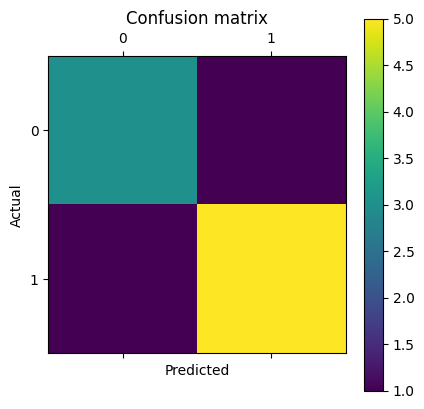

In [18]:
# Visualize the confusion matrix using a heatmap
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
nbtrainacc = nbclf.score(vs_train, vs_target_train) # Evaluate the accuracy on the training set
print(f'Accuracy of the Decision Tree classifier on the training set is {nbtrainacc}')
nnbtestacc = nbclf.score(vs_test, vs_target_test) # Evaluate the accuracy on the testing set
print(f'Accuracy of the Decision Tree classifier on the testing set is {nnbtestacc}')

Accuracy of the Decision Tree classifier on the training set is 0.675
Accuracy of the Decision Tree classifier on the testing set is 0.8


Linear Discriminant Analysis classifier

In [20]:
# Linear Discriminant Analysis classifier
ldaclf = LinearDiscriminantAnalysis() # Initialize Linear Discriminant Analysis classifier
ldaclf = ldaclf.fit(vs_train, vs_target_train) # Fit the model to the training set
ldpreds_test = ldaclf.predict(vs_test) # Predict the target labels for the testing set
print(classification_report(vs_target_test, ldpreds_test))

              precision    recall  f1-score   support

          No       1.00      0.75      0.86         4
         Yes       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [21]:
ldacm = confusion_matrix(vs_target_test, ldpreds_test) # Compute the confusion matrix
print('Confusion Matrix of the Linear Discriminant Analysis classifier')
print(ldacm)

Confusion Matrix of the Linear Discriminant Analysis classifier
[[3 1]
 [0 6]]


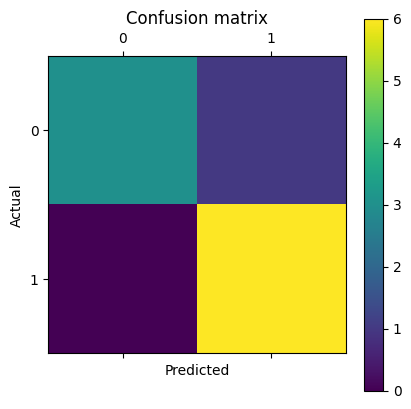

In [22]:
# Visualize the confusion matrix using a heatmap
plt.matshow(ldacm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
ldatrainacc = ldaclf.score(vs_train, vs_target_train) # Evaluate the accuracy on the training set
print(f'Accuracy of the Decision Tree classifier on the training set is {ldatrainacc}')
ldatestacc = ldaclf.score(vs_test, vs_target_test) # Evaluate the accuracy on the testing set
print(f'Accuracy of the Decision Tree classifier on the testing set is {ldatestacc}')

Accuracy of the Decision Tree classifier on the training set is 0.725
Accuracy of the Decision Tree classifier on the testing set is 0.9


#### Apply the Cross-Validation to various classifiers

In [24]:
# Perform 5-fold Cross-Validation for the KNN classifier
knn_cv_scores = cross_val_score(knnclf, vs_matrix, vs_target, cv = 5)
print(knn_cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (knn_cv_scores.mean(), knn_cv_scores.std() * 2))

[0.5 0.3 0.4 0.5 0.6]
Overall Accuracy: 0.46 (+/- 0.20)


In [25]:
# Perform 5-fold Cross-Validation for the Decision Tree classifier
dt_cv_scores = cross_val_score(dtclf, vs_matrix, vs_target, cv = 5)
print(dt_cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (dt_cv_scores.mean(), dt_cv_scores.std() * 2))

[0.5 0.4 0.9 0.4 0.7]
Overall Accuracy: 0.58 (+/- 0.39)


In [26]:
# Perform 5-fold Cross-Validation for the Naive Bayes classifier
nb_cv_scores = cross_val_score(nbclf, vs_matrix, vs_target, cv = 5)
print(nb_cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (nb_cv_scores.mean(), nb_cv_scores.std() * 2))

[0.7 0.8 0.6 0.5 0.7]
Overall Accuracy: 0.66 (+/- 0.20)


In [27]:
# Perform 5-fold Cross-Validation for the Linear Discriminant Analysis classifier
lda_cv_scores = cross_val_score(ldaclf, vs_matrix, vs_target, cv = 5)
print(lda_cv_scores)
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (lda_cv_scores.mean(), lda_cv_scores.std() * 2))

[0.8 0.7 0.7 0.7 0.7]
Overall Accuracy: 0.72 (+/- 0.08)
